<a href="https://colab.research.google.com/github/Sankeerth10/Data_Analysis_with_python/blob/main/Data_Analysis_MTL_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('mtl-crime-data.csv')

To look at the first few rows of a DataFrame

In [9]:
data.head(10)

,Unnamed: 0,category,date,postal_code,city,neighbourhood,year,count,longitude,latitude
0,0,Motor vehicle theft,2018-09-13,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567
1,1,Motor vehicle theft,2018-04-30,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567
2,2,Home Invasion,2018-01-10,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
3,3,Mischief,2018-11-12,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
4,4,Mischief,2018-08-15,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
5,5,Home Invasion,2018-01-11,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
6,6,Home Invasion,2018-01-10,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
7,7,Home Invasion,2018-01-10,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
8,8,Home Invasion,2018-01-08,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
9,9,Home Invasion,2018-09-14,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136642 entries, 0 to 136641
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     136642 non-null  int64  
 1   category       136642 non-null  object 
 2   date           136642 non-null  object 
 3   postal_code    136642 non-null  object 
 4   city           136642 non-null  object 
 5   neighbourhood  136642 non-null  object 
 6   year           136642 non-null  int64  
 7   count          136642 non-null  int64  
 8   longitude      136642 non-null  float64
 9   latitude       136642 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 10.4+ MB


Pre-Procesing and Cleaning Data: Removing Unnecssary Columns

In [11]:
data = data.drop('Unnamed: 0', axis=1)
data.columns

Index(['category', 'date', 'postal_code', 'city', 'neighbourhood', 'year',
       'count', 'longitude', 'latitude'],
      dtype='object')

In [12]:
data['date'] = pd.to_datetime(data['date'])

Convert the Date from string type to datetime format and perform further analysis

In [13]:
pd.DataFrame(data.dtypes, columns=['Datatype']).rename_axis('Columns')

,Datatype
Columns,
category,object
date,datetime64[ns]
postal_code,object
city,object
neighbourhood,object
year,int64
count,int64
longitude,float64
latitude,float64


In [14]:
pd.DataFrame(data.isnull().sum(), columns=['Missing Values']).rename_axis('Feature')

,Missing Values
Feature,
category,0
date,0
postal_code,0
city,0
neighbourhood,0
year,0
count,0
longitude,0
latitude,0


Analysis of the crime Data

Neighbourhoods have the highest number of reported crimes:

In [15]:
top_neighbourhood = pd.DataFrame(data['neighbourhood'].value_counts()).rename({"neighbourhood":"Case Reported"}, axis = 1).rename_axis("Neighbourhood").head(10)

top_neighbourhood.style.bar()

,Case Reported
Neighbourhood,
Plateau Mont-Royal,10844
Centre-Sud,7849
Downtown Montreal,7565
Mercier,7302
Montréal-Nord,6913
Rosemont,5907
Ahuntsic,5575
Petite-Patrie,5327
Saint-Laurent,5094


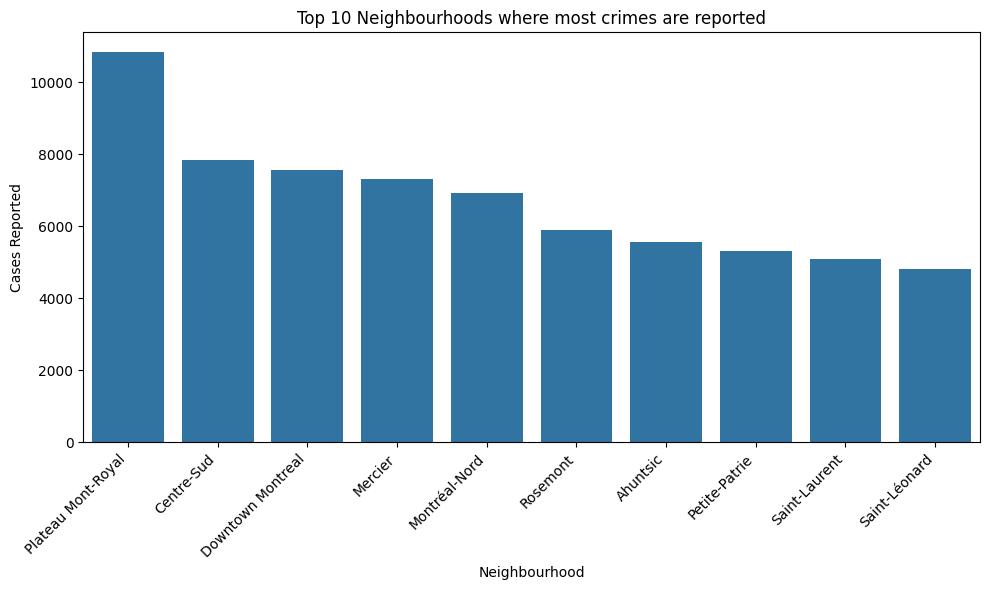

In [17]:
top_neighbourhood = top_neighbourhood.sort_values(by='Case Reported', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_neighbourhood, x=top_neighbourhood.index, y='Case Reported')

plt.xlabel('Neighbourhood')
plt.ylabel('Cases Reported')
plt.title('Top 10 Neighbourhoods where most crimes are reported')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

Most frequent crimes by neighbourhood

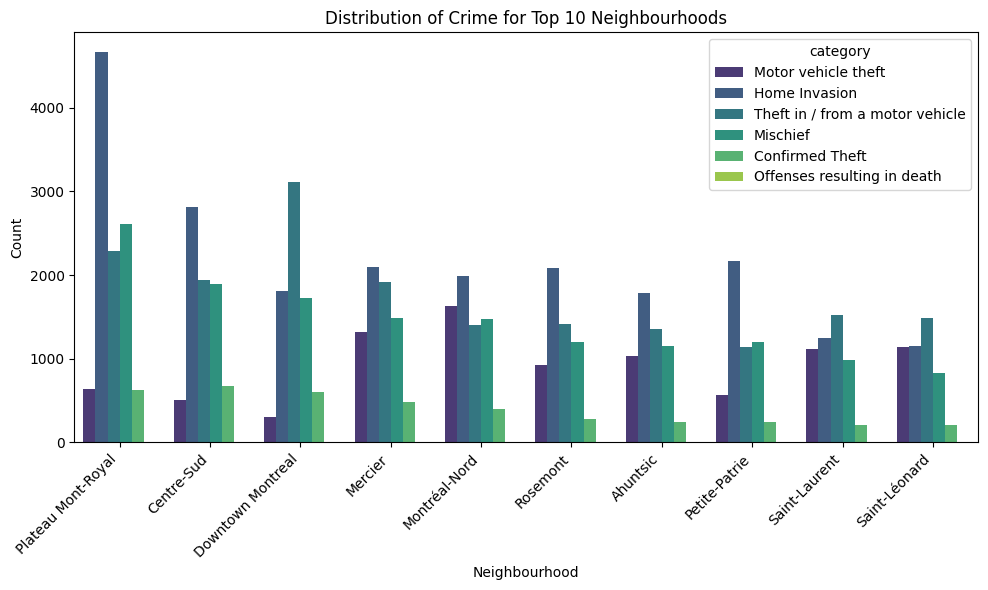

In [18]:
top_neighbourhoods = data['neighbourhood'].value_counts().head(10).index

# Filter the data to include only the top 10 neighbourhoods
data_top_neighbourhoods = data[data['neighbourhood'].isin(top_neighbourhoods)]

# Get the order of neighborhoods by crime count in descending order
neighbourhood_order = data_top_neighbourhoods.groupby('neighbourhood')['category'].count().sort_values(ascending=False).index

# Create a count plot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=data_top_neighbourhoods, x='neighbourhood', hue='category', palette='viridis', order=neighbourhood_order)

# Adding labels and title
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Distribution of Crime for Top 10 Neighbourhoods')

# Slightly rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

Number of reported crimes committed annualy in Montreal

In [19]:
pd.DataFrame(data['year'].value_counts()).rename({"year":"Case Reported"}, axis = 1).rename_axis("Year")

,Case Reported
Year,
2015,24222
2016,23407
2017,22611
2018,19419
2019,18650
2020,17786
2021,10547


from matplotlib import pyplot as plt
_df_0['Case Reported'].plot(kind='hist', bins=20, title='Case Reported')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Case Reported'].plot(kind='line', figsize=(8, 4), title='Case Reported')
plt.gca().spines[['top', 'right']].set_visible(False)

General trends in the reported crimes between 2015-2021

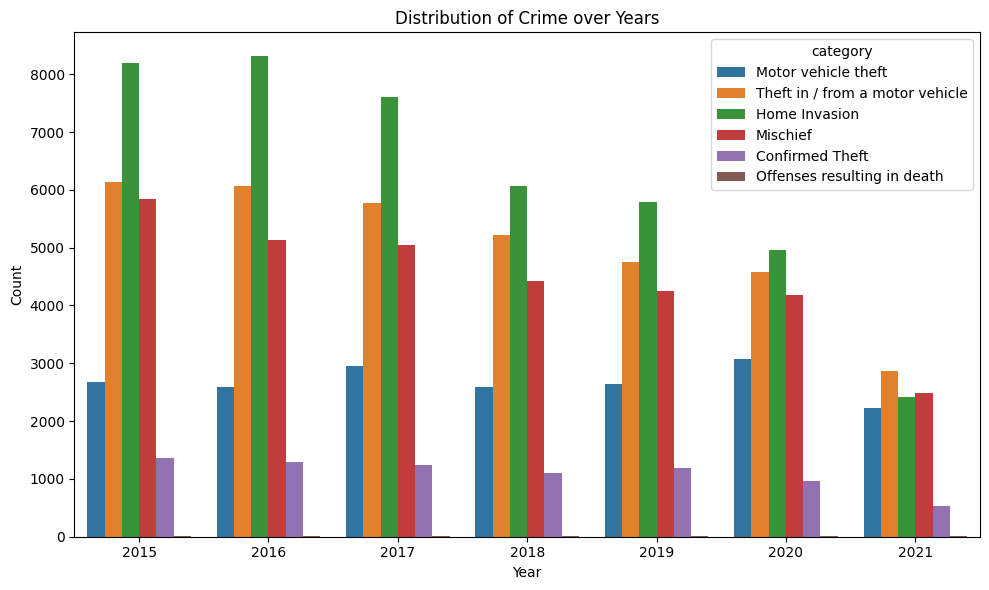

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='year', hue='category')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Crime over Years')

# Display the plot
plt.tight_layout()
plt.show()

Trend between 2015-2021

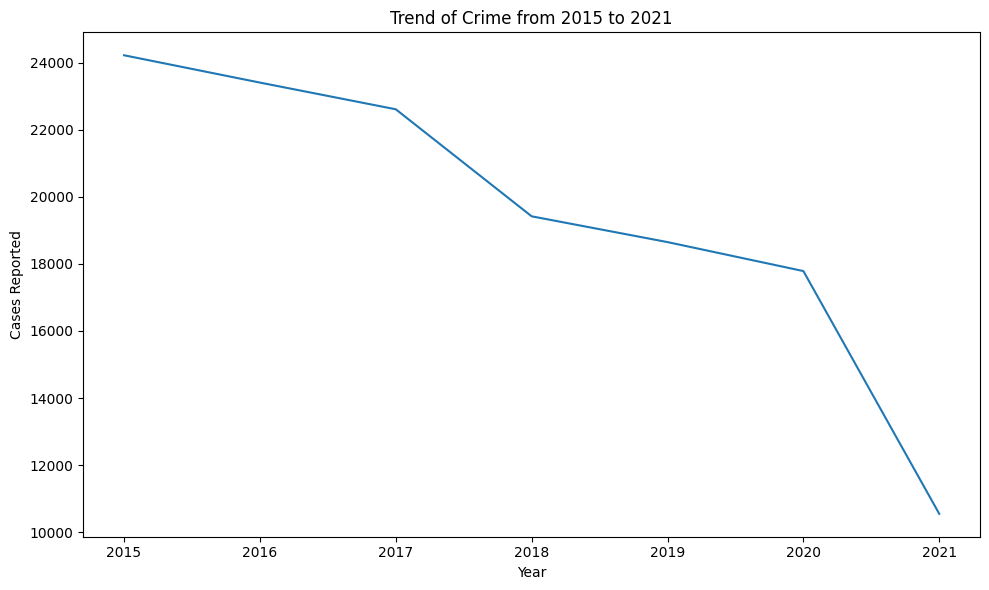

In [21]:
# Calculate the year-wise trend of crime rates
year_wise_trend = data.groupby('year').sum(numeric_only=True).drop(['longitude', 'latitude'], axis=1).rename({'count': 'Case Reported'}, axis=1)

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=year_wise_trend, x=year_wise_trend.index, y='Case Reported')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Cases Reported')
plt.title('Trend of Crime from 2015 to 2021')

# Display the plot
plt.tight_layout()
plt.show()

Days and months when higher number of crimes are reported

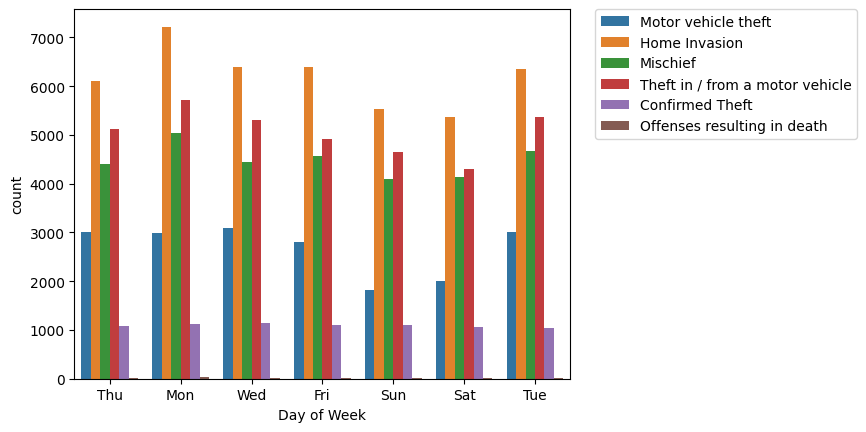

In [23]:
data['Month'] = data['date'].apply(lambda time: time.month)
data['Day of Week'] = data['date'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['Day of Week'] = data['Day of Week'].map(dmap)

sns.countplot(x='Day of Week',data=data,hue='category')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)